<a href="https://colab.research.google.com/github/AxlSyr/ArtificialIntelligenceUAEM/blob/master/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://upload.wikimedia.org/wikipedia/commons/2/25/Logo_uaem_morelos.png" style="width: 400px;"/>

<h2><center>Instituto de Investigación en Ciencias Básicas y Aplicadas (IICBA)</center></h2>
<h2><center>Centro de Investigación en Ciencias (CINC)</center></h2>

<h3><center>Curso: Inteligencia Artificial</center>
<center>Profesor: Mauricio Rosales Rivera</center>
<center>Mini Proyecto</center></h3>
    
<h3><center>Fecha: Noviembre 25, 2020</center></h3>

---

<h3>Calificación: </h3>

---
<h4><center>Estudiantes</center></h4>
<h4>Nombres: Axel Reyes Flores y Luis Alfredo Reynoso Gomez</h4>
<h4>Matrículas: 10018747 y 10018748</h4>

## <font color="brown">Proyecto - Inteligencia Artificial</font>

---

<a id="general"></a>
### Contenido

1. [Introducción](#a)

-----

<h2>Primera implementación</h2>


2. [Exploración de Datos](#b)
    * Visualizando datos
    * Preprocesamiento de datos

3. [Selección de modelos](#c)
    * Selección de modelo
    * Entrenamiento
    * Prueba
    * Resultados
-----

<h2>Segundo implementación</h2>


4. [Exploración de Datos](#d)
    * Visualizando datos
    * Preprocesamiento de datos


5. [Selección de modelos](#e)
    * Selección de modelo
    * Entrenamiento
    * Prueba
    * Resultados
-----

<h2>Tercer implementación</h2>


6. [Exploración de Datos](#f)
    * Visualizando datos
    * Preprocesamiento de datos


7. [Selección de modelos](#g)
    * Selección de modelo
    * Entrenamiento
    * Prueba
    * Resultados
-----

8. [Conclusiones](#h)

-----

<a id="a"></a>
### 1. Introducción

---

En este proyecto exploramos algoritmos de aprendizaje máquina para el análisis de series de tiempo y explicamos por qué funcionan en el trading de la vida real.
Muchas veces nos engañan con resultados sorprendentes en los que los datos de prueba coinciden casi a la perfección con las predicciones. Un truco común es mostrar una gráfica con valores predichos en un período largo de datos, lo que crea la ilusión de que el retraso es insignificante o que no se verá en lo absoluto.
Mientras realizabamos este proyecto nos dimos cuenta de que el modelo puede ser tan bueno como nuestros datos.

El trading es el proceso de compra y venta de acciones en un día. Podría ser tan simple como comprar acciones de una empresa por la mañana y venderlas al final del día (4 pm para ser precisos). Aunque el acto en sí es simple, requiere mucha experiencia e información a la mano para comprar las acciones correctas que probablemente aumentarán. El trading es muy riesgoso debido al comportamiento a corto plazo de los mercados que reflejan miles de millones de valores que fluctúan rápidamente en respuesta a condiciones cambiantes que parecen aleatorias. Más del 95% de los comerciantes pierden dinero.

El trading requiere mucha atención y sensibilidad al mercado. Los traders experimentados confían en múltiples fuentes de información, como noticias, datos históricos, informes de ganancias e información privilegiada de la empresa. El riesgo es alto y es necesario considerar muchas variables. Por esa razón, algunas instituciones financieras dependen exclusivamente de las máquinas para realizar transacciones. Eso significa que una computadora con conexiones a Internet de alta velocidad puede ejecutar miles de operaciones durante un día obteniendo ganancias con una pequeña diferencia en los precios. A esto se le llama comercio de alta frecuencia. Ningún humano puede competir con estos algoritmos, son extremadamente rápidos y más precisos.

Como estudiantes de ciencias computacionales, nos entusiasma mucho probar diferentes algoritmos de aprendizaje máquina y responder la pregunta: ¿se puede utilizar el aprendizaje máquina para predecir el movimiento del mercado de valores?

**Presentación del modelo**

El pronóstico de series de tiempo es una técnica que utiliza los valores de datos de series de tiempo y luego los usa para hacer predicciones sobre valores futuros en nuestros puntos de datos históricos.

Sea nuestro vector de datos de series de tiempo:
$T = [[t1], [t2], [t3], ..., [tn]]$
nuestra tarea es predecir o pronosticar los valores futuros $[[tn + 1], [tn + 2], ...]$ basados ​​en los datos históricos, es decir, nuestro vector de datos de series de tiempo.

RNN son las siglas de Recurrent Neural Networks. RNN está diseñado para procesar cualquier patrón oculto presente en los datos teniendo en cuenta la naturaleza secuencial de los datos. RNN no alimenta toda la información a la red a la vez como la red neuronal tradicional, RNN tiene bucles, se puede pensar en múltiples copias de la misma red, cada una pasando un mensaje al siguiente en orden. Si desenrollamos el bucle, forma una estructura en forma de cadena que permite que un elemento pase a la vez, lo procese y luego alimente el segundo elemento en la secuencia y así sucesivamente.

Una red neuronal recurrente simple tiene una estructura muy simple, que forma una cadena de módulos repetidos de una red neuronal, con solo una función de activación única como la capa tanh, de manera similar, **LSTM** también tiene una estructura en forma de cadena con módulos repetidos como RNN pero en lugar de una sola capa de red neuronal en RNN, LSTM tiene cuatro capas que interactúan de una manera muy diferente, cada una de las cuales realiza su función única en la red.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
dataset = np.random.randint(10, size=(100, 1))

In [3]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [4]:
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

70 30


In [5]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [6]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [7]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [8]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
68/68 - 0s - loss: 0.3154
Epoch 2/100
68/68 - 0s - loss: 0.2419
Epoch 3/100
68/68 - 0s - loss: 0.1838
Epoch 4/100
68/68 - 0s - loss: 0.1425
Epoch 5/100
68/68 - 0s - loss: 0.1176
Epoch 6/100
68/68 - 0s - loss: 0.1049
Epoch 7/100
68/68 - 0s - loss: 0.0994
Epoch 8/100
68/68 - 0s - loss: 0.0975
Epoch 9/100
68/68 - 0s - loss: 0.0972
Epoch 10/100
68/68 - 0s - loss: 0.0969
Epoch 11/100
68/68 - 0s - loss: 0.0967
Epoch 12/100
68/68 - 0s - loss: 0.0965
Epoch 13/100
68/68 - 0s - loss: 0.0966
Epoch 14/100
68/68 - 0s - loss: 0.0975
Epoch 15/100
68/68 - 0s - loss: 0.0967
Epoch 16/100
68/68 - 0s - loss: 0.0968
Epoch 17/100
68/68 - 0s - loss: 0.0970
Epoch 18/100
68/68 - 0s - loss: 0.0969
Epoch 19/100
68/68 - 0s - loss: 0.0969
Epoch 20/100
68/68 - 0s - loss: 0.0967
Epoch 21/100
68/68 - 0s - loss: 0.0965
Epoch 22/100
68/68 - 0s - loss: 0.0969
Epoch 23/100
68/68 - 0s - loss: 0.0964
Epoch 24/100
68/68 - 0s - loss: 0.0966
Epoch 25/100
68/68 - 0s - loss: 0.0971
Epoch 26/100
68/68 - 0s - loss: 0.

In [9]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f' % (testScore))

Train Score: 2.79
Test Score: 2.70


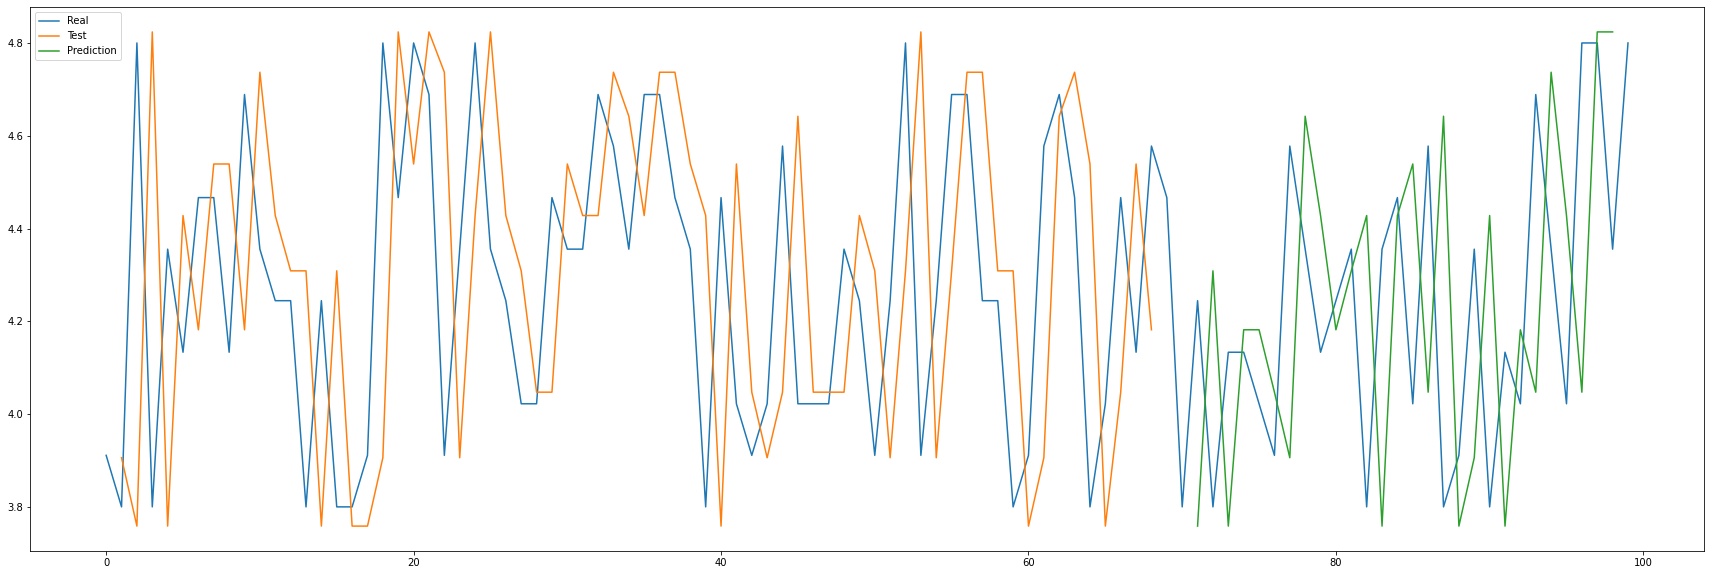

In [208]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

plt.gcf().set_size_inches(30, 10)
plt.plot([i + 3.8 for i in dataset])
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['Real', 'Test', 'Prediction'])
plt.show()

<h2>Primer acercamiento</h2>

<a id="b"></a>
### Exploración de Datos

---
[Regresar a contenido](#general)

In [11]:
!pip install yfinance

     |████████████████████████████████| 5.5MB 6.0MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22615 sha256=0709fc9d809678f70a0dec5e31f4160de525e024a07424dcc788a807119e2f9a
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
import yfinance as yf
from pandas_datareader import data as pdr

In [13]:
ticker = "EURUSD=X"

yf.pdr_override()
df = pdr.get_data_yahoo(ticker, start="2020-11-01", end="2020-12-08", interval = "5m")
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2020-11-02 00:00:00+00:00,1.164551,1.164822,1.164415,1.164822,1.164822,0
2020-11-02 00:05:00+00:00,1.164687,1.164687,1.164551,1.164687,1.164687,0
2020-11-02 00:10:00+00:00,1.164687,1.164687,1.164551,1.164551,1.164551,0
2020-11-02 00:15:00+00:00,1.164687,1.164822,1.164687,1.164687,1.164687,0
2020-11-02 00:20:00+00:00,1.164415,1.164551,1.164415,1.164415,1.164415,0
...,...,...,...,...,...,...
2020-12-07 23:35:00+00:00,1.211534,1.211974,1.211534,1.211681,1.211681,0
2020-12-07 23:40:00+00:00,1.211534,1.211681,1.211534,1.211681,1.211681,0
2020-12-07 23:45:00+00:00,1.211534,1.211827,1.211534,1.211827,1.211827,0


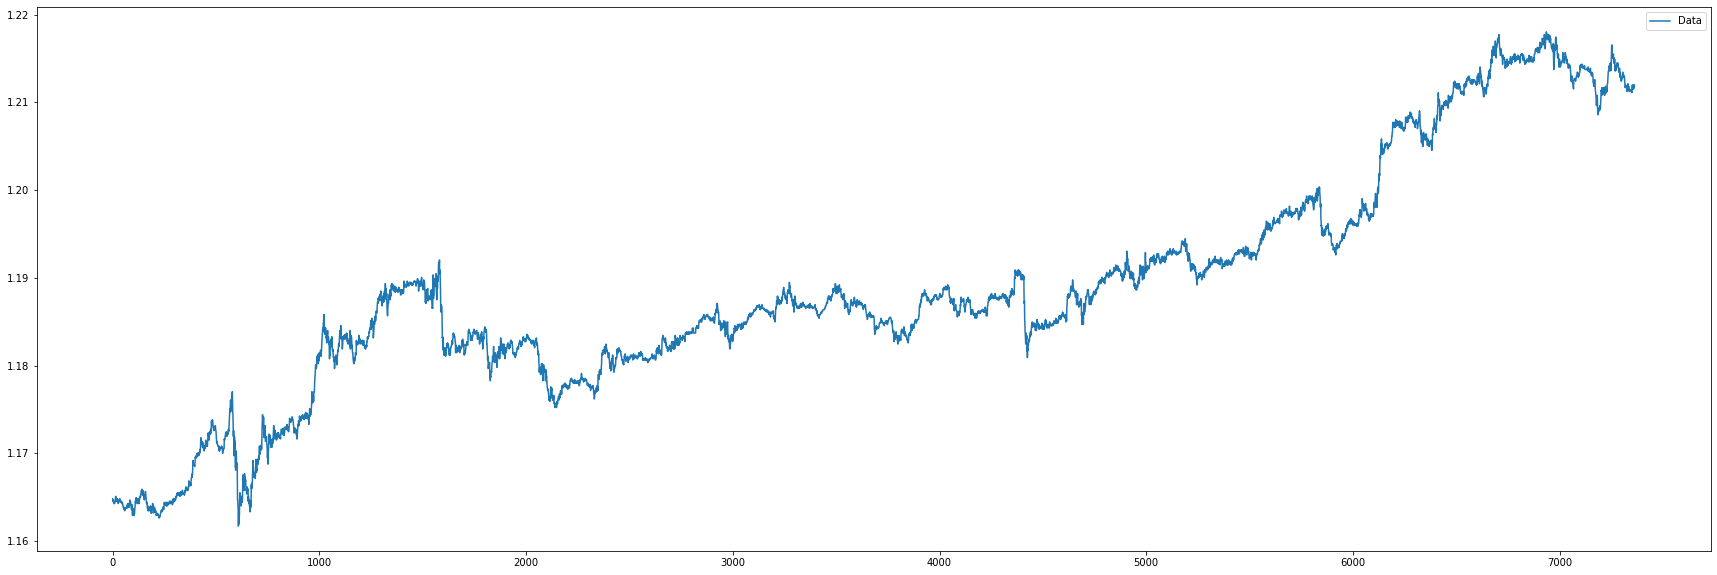

In [29]:
plt.gcf().set_size_inches(30, 10)
plt.plot(df['Close'])
plt.legend(['Data'])
plt.show()

In [14]:
df = df.drop('Volume', axis = 1)
df = df.drop('Adj Close', axis = 1)
df

,Open,High,Low,Close
Datetime,,,,
2020-11-02 00:00:00+00:00,1.164551,1.164822,1.164415,1.164822
2020-11-02 00:05:00+00:00,1.164687,1.164687,1.164551,1.164687
2020-11-02 00:10:00+00:00,1.164687,1.164687,1.164551,1.164551
2020-11-02 00:15:00+00:00,1.164687,1.164822,1.164687,1.164687
2020-11-02 00:20:00+00:00,1.164415,1.164551,1.164415,1.164415
...,...,...,...,...
2020-12-07 23:35:00+00:00,1.211534,1.211974,1.211534,1.211681
2020-12-07 23:40:00+00:00,1.211534,1.211681,1.211534,1.211681
2020-12-07 23:45:00+00:00,1.211534,1.211827,1.211534,1.211827


In [15]:
df.to_csv('out.csv')
df=pd.read_csv('out.csv')
df

,Datetime,Open,High,Low,Close
0,2020-11-02 00:00:00+00:00,1.164551,1.164822,1.164415,1.164822
1,2020-11-02 00:05:00+00:00,1.164687,1.164687,1.164551,1.164687
2,2020-11-02 00:10:00+00:00,1.164687,1.164687,1.164551,1.164551
3,2020-11-02 00:15:00+00:00,1.164687,1.164822,1.164687,1.164687
4,2020-11-02 00:20:00+00:00,1.164415,1.164551,1.164415,1.164415
...,...,...,...,...,...
7358,2020-12-07 23:35:00+00:00,1.211534,1.211974,1.211534,1.211681
7359,2020-12-07 23:40:00+00:00,1.211534,1.211681,1.211534,1.211681
7360,2020-12-07 23:45:00+00:00,1.211534,1.211827,1.211534,1.211827
7361,2020-12-07 23:50:00+00:00,1.211681,1.211681,1.211681,1.211681


In [16]:
puntos_pasados = 100

In [17]:
def csv_to_dataset(datos_entrenar):

    datos_entrenar = datos_entrenar.drop('Datetime', axis=1)
    
    normalizador = preprocessing.MinMaxScaler()
    datos_entrenar_normalizados = normalizador.fit_transform(datos_entrenar)

    todo_entrenar_y = np.array([datos_entrenar_normalizados[:,3][i + puntos_pasados].copy() for i in range(len(datos_entrenar_normalizados) - puntos_pasados)])
    
    datos_cierre = np.array([datos_entrenar.iloc[:,3][i + puntos_pasados].copy() for i in range(len(datos_entrenar) - puntos_pasados)])
    datos_cierre = np.expand_dims(todo_entrenar_y, -1)
    
    datos_entrenar = datos_entrenar.drop('Close', axis=1)
    datos_x_entrenar_normalizados = normalizador.fit_transform(datos_entrenar)


    todo_entrenar_x = np.array([datos_x_entrenar_normalizados[i  : i + puntos_pasados].copy() for i in range(len(datos_x_entrenar_normalizados) - puntos_pasados)])
    
    
    y_scaler = preprocessing.MinMaxScaler()
    y_scaler.fit(datos_cierre )

    assert todo_entrenar_x.shape[0] == todo_entrenar_y.shape[0]

    return todo_entrenar_x, todo_entrenar_y, datos_cierre, y_scaler  

In [18]:
todo_entrenar_x, todo_entrenar_y, datos_cierre, y_scaler = csv_to_dataset(df)

test_split = 0.9
n = int(todo_entrenar_x.shape[0] * test_split)
print("------------")
print(n)

x_train = todo_entrenar_x[:n]
y_train = todo_entrenar_y[:n]

x_test = todo_entrenar_x[n:]
y_test = todo_entrenar_y[n:]

y_test_sin_escalar = datos_cierre[n:]

------------
6536


<a id="c"></a>
### 3. Selección de modelos

---
[Regresar a contenido](#general)

In [19]:
import keras
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
from keras import optimizers

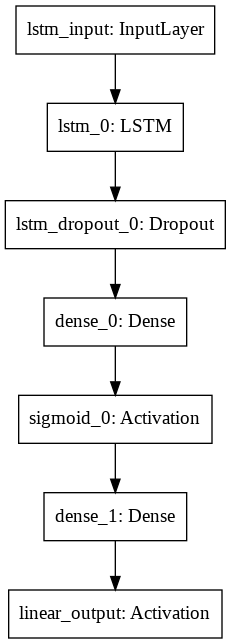

In [20]:
lstm_input = Input(shape=(puntos_pasados, 3), name='lstm_input')

x = LSTM(puntos_pasados, name='lstm_0')(lstm_input)
x = Dropout(0.2, name='lstm_dropout_0')(x)
x = Dense(64, name='dense_0')(x)
x = Activation('sigmoid', name='sigmoid_0')(x)
x = Dense(1, name='dense_1')(x)

output = Activation('linear', name='linear_output')(x)
model = Model(inputs=lstm_input, outputs=output)

adam = optimizers.Adam(lr=0.0005)

model.compile(optimizer=adam, loss='mse')

from keras.utils import plot_model

plot_model(model, to_file='model.png')


In [21]:
model.fit(x=x_train, y=y_train, batch_size=32, epochs=puntos_pasados, shuffle=True, validation_split=0.1)
evaluation = model.evaluate(x_test, y_test)
print(evaluation)

Epoch 1/100
184/184 [==============================] - 12s 67ms/step - loss: 0.0232 - val_loss: 0.0163
Epoch 2/100
184/184 [==============================] - 12s 64ms/step - loss: 6.7685e-04 - val_loss: 0.0015
Epoch 3/100
184/184 [==============================] - 12s 65ms/step - loss: 4.7339e-04 - val_loss: 3.1925e-04
Epoch 4/100
184/184 [==============================] - 12s 65ms/step - loss: 3.9571e-04 - val_loss: 2.1791e-04
Epoch 5/100
184/184 [==============================] - 12s 65ms/step - loss: 3.1981e-04 - val_loss: 2.3648e-04
Epoch 6/100
184/184 [==============================] - 12s 65ms/step - loss: 3.2204e-04 - val_loss: 6.4453e-04
Epoch 7/100
184/184 [==============================] - 12s 68ms/step - loss: 2.7973e-04 - val_loss: 6.3377e-04
Epoch 8/100
184/184 [==============================] - 13s 68ms/step - loss: 2.7658e-04 - val_loss: 1.7138e-04
Epoch 9/100
184/184 [==============================] - 12s 67ms/step - loss: 2.5566e-04 - val_loss: 1.3294e-04
Epoch 10/100


In [22]:
prediccion_y_test = model.predict(x_test)

prediccion_y_test = y_scaler.inverse_transform(prediccion_y_test)

# y_predicted = model.predict(todo_entrenar_x)
# y_predicted = y_scaler.inverse_transform(y_predicted)

assert y_test_sin_escalar.shape == prediccion_y_test.shape

real_mse = np.mean(np.square(y_test_sin_escalar - prediccion_y_test))
scaled_mse = real_mse / (np.max(y_test_sin_escalar) - np.min(y_test_sin_escalar)) * 100
print(scaled_mse)

0.04263912949879633


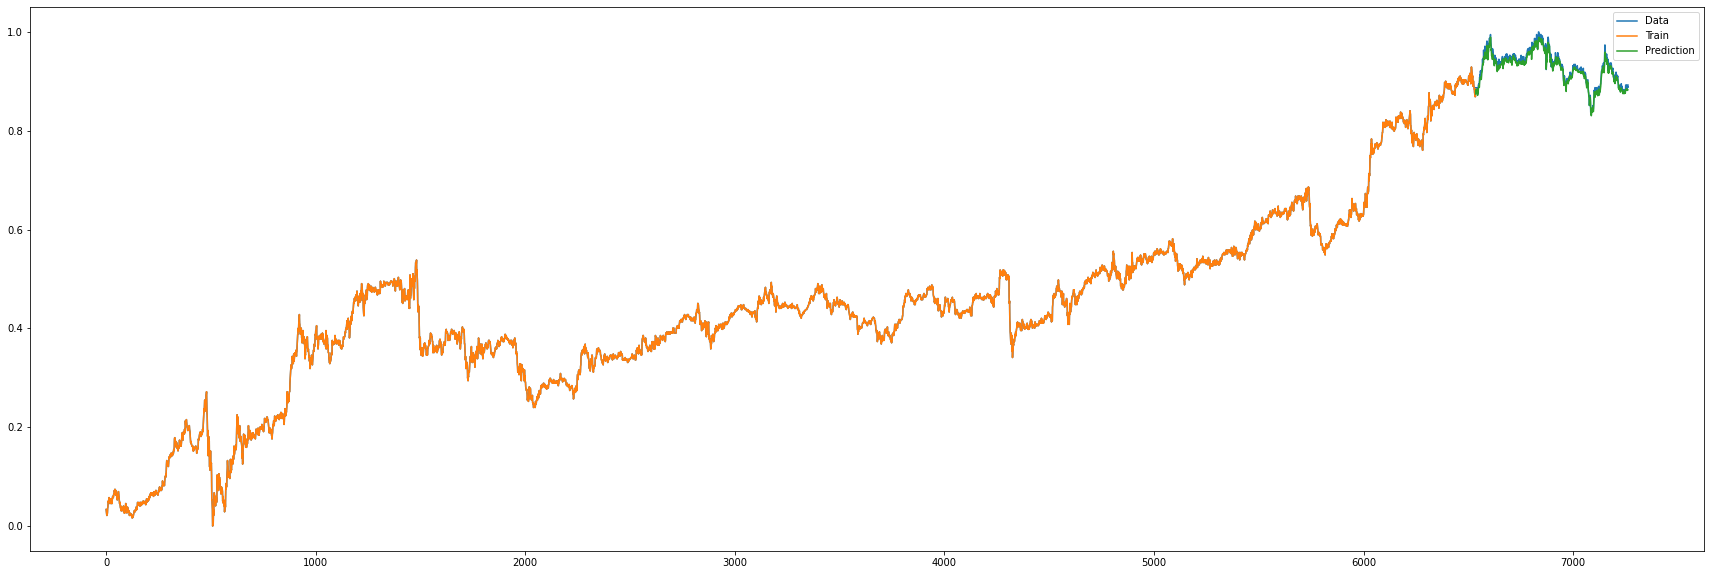

In [59]:
trainPredictPlot = np.empty_like(todo_entrenar_y)
trainPredictPlot[:] = np.nan
trainPredictPlot[:len(y_train)] = y_train

testPredictPlot = np.empty_like(todo_entrenar_y)
testPredictPlot[:] = np.nan
testPredictPlot[len(y_train) - 1:-1] = prediccion_y_test[:, 0]

plt.gcf().set_size_inches(30, 10)
plt.plot(todo_entrenar_y)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['Data', 'Train', 'Prediction'])
plt.show()

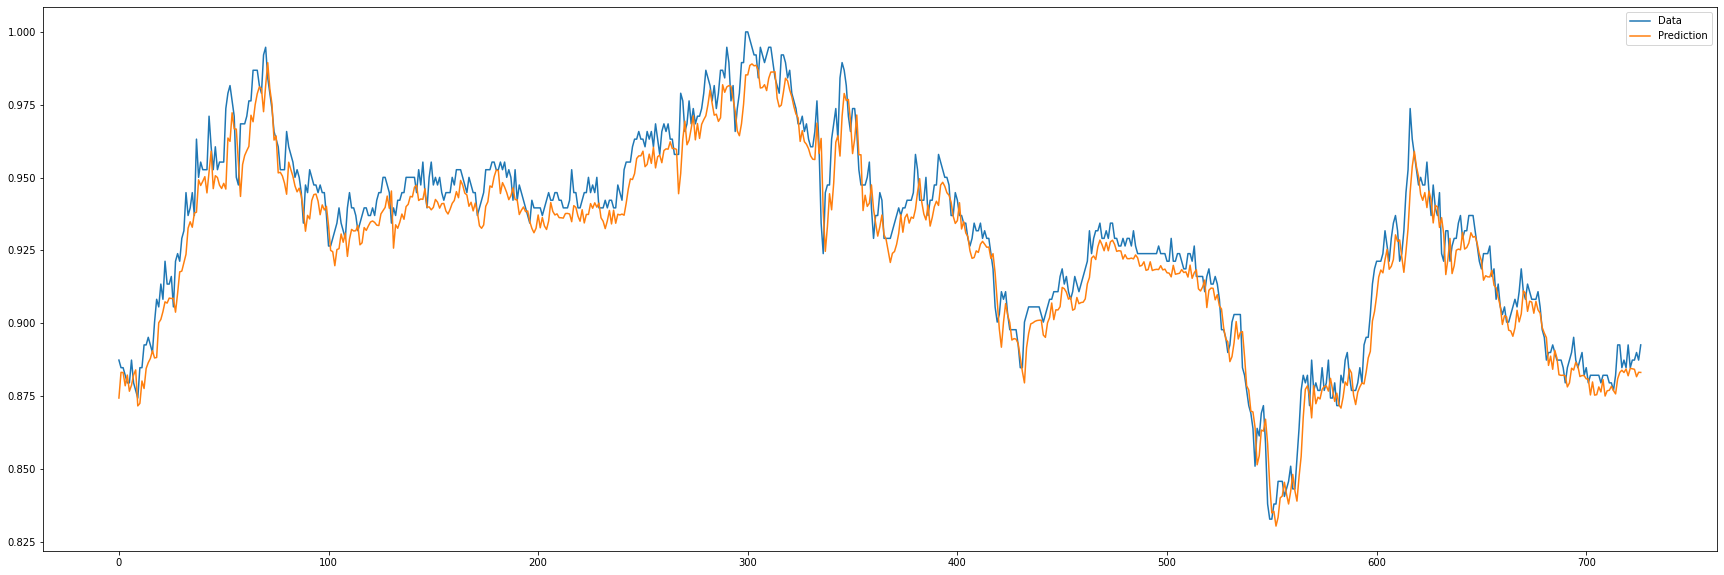

In [175]:
testPredictPlot = np.empty_like(todo_entrenar_y[6535:])
testPredictPlot[:] = np.nan
testPredictPlot[:-1] = prediccion_y_test[:, 0]

plt.gcf().set_size_inches(30, 10)
plt.gcf().set_size_inches(30, 10)

plt.plot(todo_entrenar_y[6536:])
plt.plot(testPredictPlot)
plt.legend(['Data', 'Prediction'])
plt.show()

<h2>Segundo acercamiento</h2>

<a id="d"></a>

### 1. Exploración de datos
---
[Regresar a contenido](#general)

In [177]:
df=pd.read_csv('out.csv')

In [178]:
puntos_pasados = 100

In [179]:
def csv_to_dataset(datos_entrenar):

    datos_entrenar = datos_entrenar.drop('Datetime', axis=1)
    
    normalizador = preprocessing.MinMaxScaler()
    datos_entrenar_normalizados = normalizador.fit_transform(datos_entrenar)

    todo_entrenar_y = np.array([datos_entrenar_normalizados[:,3][i + puntos_pasados].copy() for i in range(len(datos_entrenar_normalizados) - puntos_pasados)])
    
    datos_cierre = np.array([datos_entrenar.iloc[:,3][i + puntos_pasados].copy() for i in range(len(datos_entrenar) - puntos_pasados)])
    datos_cierre = np.expand_dims(todo_entrenar_y, -1)
    
    datos_entrenar = datos_entrenar.drop('Close', axis=1)
    datos_x_entrenar_normalizados = normalizador.fit_transform(datos_entrenar)


    todo_entrenar_x = np.array([datos_x_entrenar_normalizados[i  : i + puntos_pasados].copy() for i in range(len(datos_x_entrenar_normalizados) - puntos_pasados)])
    
    
    y_scaler = preprocessing.MinMaxScaler()
    y_scaler.fit(datos_cierre )


    datos_indicadores = np.array([datos_entrenar_normalizados[i  : i + puntos_pasados].copy() for i in range(len(datos_entrenar_normalizados) - puntos_pasados)])
    indicadores = []
    for cierre in datos_indicadores:
        sma = np.mean(cierre[:,3])
        indicadores.append(np.array([sma]))


    indicadores = np.array(indicadores)
		
    indicadores_scaler = preprocessing.MinMaxScaler()
    indicadores_normalizados = indicadores_scaler.fit_transform(indicadores)


    
    assert todo_entrenar_x.shape[0] == todo_entrenar_y.shape[0] == indicadores_normalizados.shape[0]

    return todo_entrenar_x, todo_entrenar_y, datos_cierre, y_scaler, indicadores_normalizados

In [180]:
todo_entrenar_x, todo_entrenar_y, datos_cierre, y_scaler, indicadores_normalizados = csv_to_dataset(df)

test_split = 0.9
n = int(todo_entrenar_x.shape[0] * test_split)

x_train = todo_entrenar_x[:n]
indicadores_train = indicadores_normalizados[:n]
y_train = todo_entrenar_y[:n]

x_test = todo_entrenar_x[n:]
indicadores_test = indicadores_normalizados[n:]
y_test = todo_entrenar_y[n:]

y_test_sin_escalar = datos_cierre[n:]

<a id="e"></a>
### 3. Selección de modelos

---
[Regresar a contenido](#general)

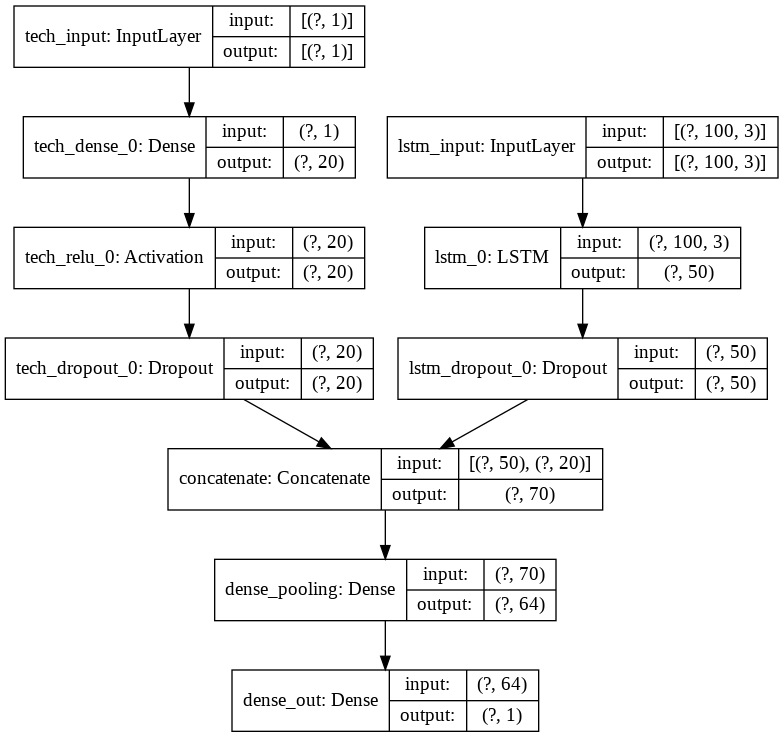

In [181]:
lstm_input = Input(shape=(puntos_pasados, 3), name='lstm_input')
dense_input = Input(shape=(indicadores_normalizados.shape[1],), name='tech_input')

x = LSTM(50, name='lstm_0')(lstm_input)
x = Dropout(0.2, name='lstm_dropout_0')(x)
lstm_branch = Model(inputs=lstm_input, outputs=x)

y = Dense(20, name='tech_dense_0')(dense_input)
y = Activation("relu", name='tech_relu_0')(y)
y = Dropout(0.2, name='tech_dropout_0')(y)
indicadores_normalizados_branch = Model(inputs=dense_input, outputs=y)

combined = concatenate([lstm_branch.output, indicadores_normalizados_branch.output], name='concatenate')
 
z = Dense(64, activation="sigmoid", name='dense_pooling')(combined)
z = Dense(1, activation="linear", name='dense_out')(z)

model = Model(inputs=[lstm_branch.input, indicadores_normalizados_branch.input], outputs=z)

adam = optimizers.Adam(lr=0.0005)

model.compile(optimizer=adam, loss='mse')

from keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True)


In [182]:
model.fit(x=[x_train, indicadores_train], y=y_train, batch_size=32, epochs=puntos_pasados, shuffle=True, validation_split=0.1)
evaluation = model.evaluate([x_test, indicadores_test], y_test)
print(evaluation)


Epoch 1/100
184/184 [==============================] - 8s 42ms/step - loss: 0.0041 - val_loss: 0.0033
Epoch 2/100
184/184 [==============================] - 7s 39ms/step - loss: 7.8105e-04 - val_loss: 0.0025
Epoch 3/100
184/184 [==============================] - 7s 40ms/step - loss: 5.6548e-04 - val_loss: 3.8061e-04
Epoch 4/100
184/184 [==============================] - 7s 40ms/step - loss: 4.1458e-04 - val_loss: 4.7469e-04
Epoch 5/100
184/184 [==============================] - 7s 41ms/step - loss: 3.7777e-04 - val_loss: 1.4841e-04
Epoch 6/100
184/184 [==============================] - 7s 41ms/step - loss: 3.3615e-04 - val_loss: 2.1226e-04
Epoch 7/100
184/184 [==============================] - 7s 40ms/step - loss: 3.1404e-04 - val_loss: 1.7617e-04
Epoch 8/100
184/184 [==============================] - 7s 41ms/step - loss: 2.9244e-04 - val_loss: 4.9347e-04
Epoch 9/100
184/184 [==============================] - 7s 40ms/step - loss: 2.7762e-04 - val_loss: 1.5932e-04
Epoch 10/100
184/184 [

In [183]:
prediccion_y_test = model.predict([x_test, indicadores_test])
prediccion_y_test = y_scaler.inverse_transform(prediccion_y_test)
# y_predicted = model.predict([ohlcv_histories, indicadores_test])
# y_predicted = y_normaliser.inverse_transform(y_predicted)
assert y_test_sin_escalar.shape == prediccion_y_test.shape
real_mse = np.mean(np.square(y_test_sin_escalar - prediccion_y_test))
scaled_mse = real_mse / (np.max(y_test_sin_escalar) - np.min(y_test_sin_escalar)) * 100
print(scaled_mse)


0.4453065234212933


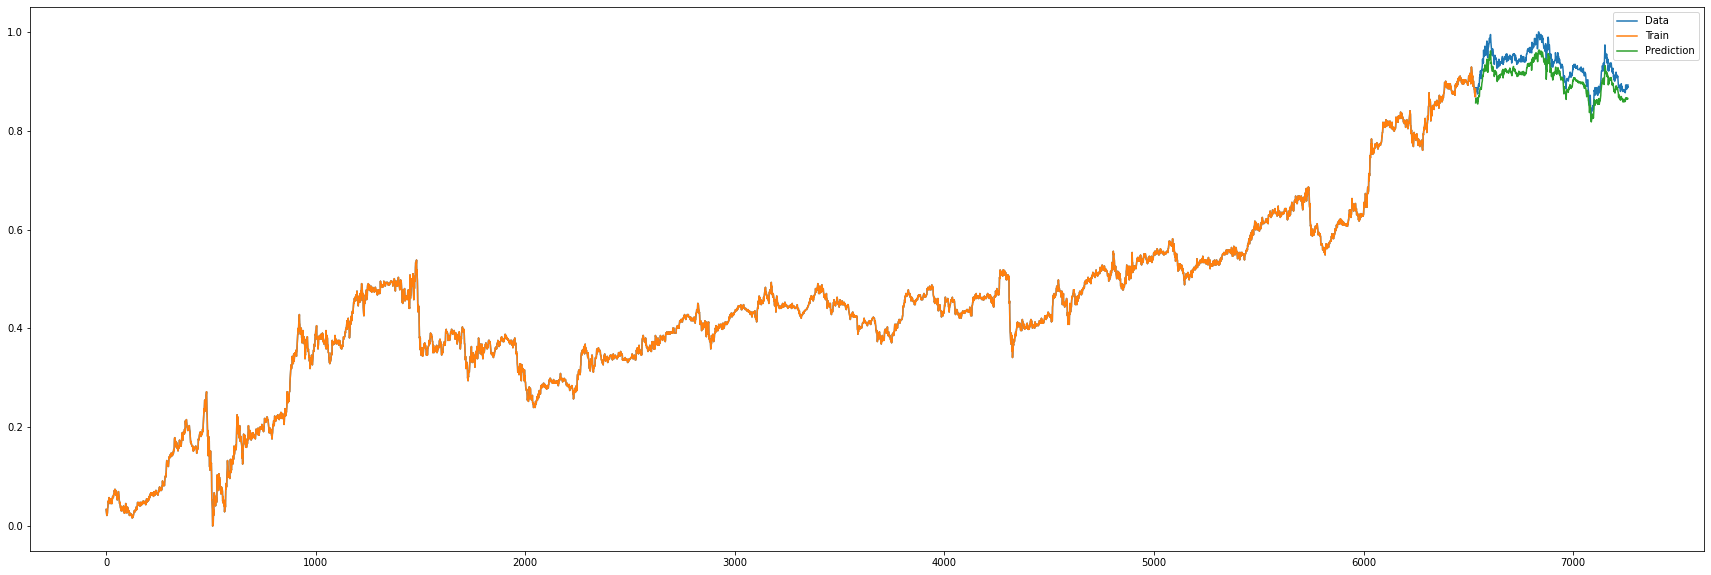

In [187]:
trainPredictPlot = np.empty_like(todo_entrenar_y)
trainPredictPlot[:] = np.nan
trainPredictPlot[:len(y_train)] = y_train

testPredictPlot = np.empty_like(todo_entrenar_y)
testPredictPlot[:] = np.nan
testPredictPlot[len(y_train) - 1:-1] = prediccion_y_test[:, 0]

plt.gcf().set_size_inches(30, 10)
plt.plot(todo_entrenar_y)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['Data', 'Train', 'Prediction'])
plt.show()

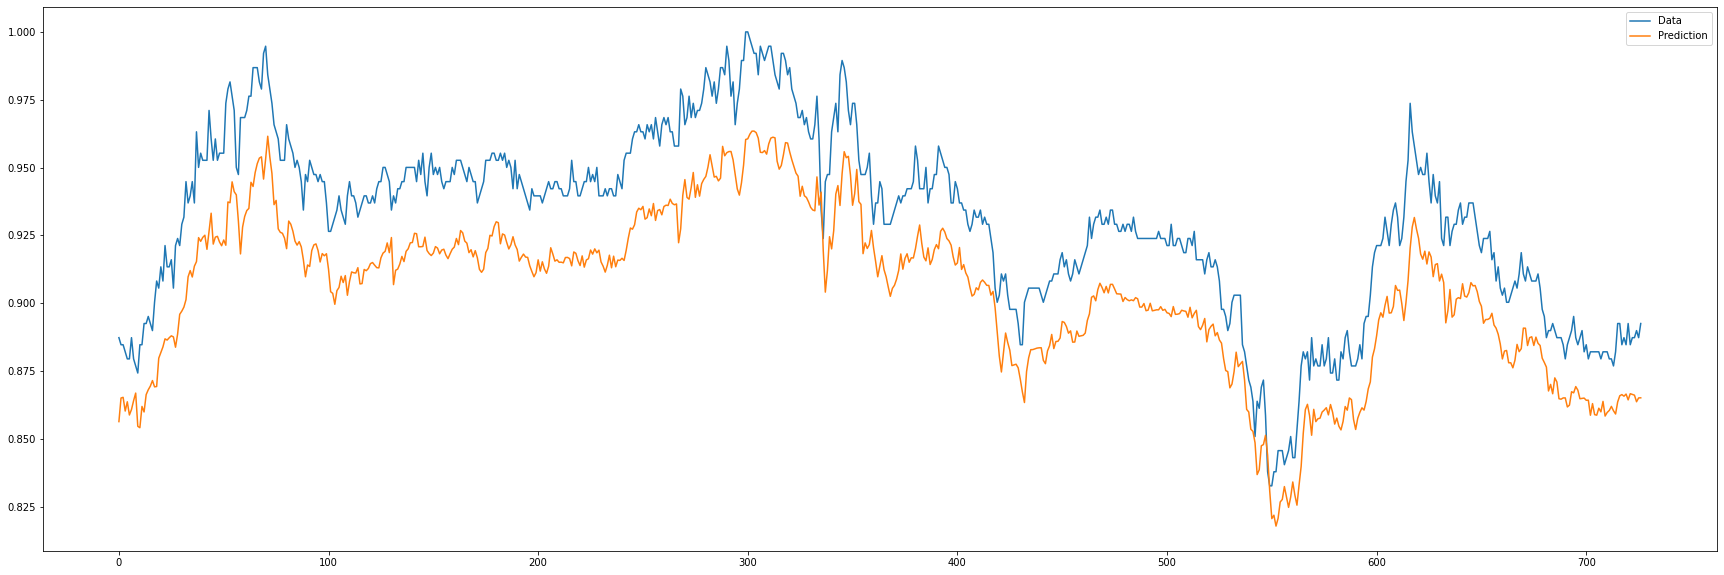

In [190]:
testPredictPlot = np.empty_like(todo_entrenar_y[6535:])
testPredictPlot[:] = np.nan
testPredictPlot[:-1] = prediccion_y_test[:, 0]

plt.gcf().set_size_inches(30, 10)
plt.gcf().set_size_inches(30, 10)

plt.plot(todo_entrenar_y[6536:])
plt.plot(testPredictPlot)
plt.legend(['Data', 'Prediction'])
plt.show()

<h2>Tercer acercamiento</h2>

<a id="f"></a>

### 1. Exploración de datos
---
[Regresar a contenido](#general)

In [191]:
df=pd.read_csv('out.csv')

In [192]:
puntos_pasados = 100

In [193]:
def csv_to_dataset(datos_entrenar):

    datos_entrenar = datos_entrenar.drop('Datetime', axis=1)
    
    normalizador = preprocessing.MinMaxScaler()
    datos_entrenar_normalizados = normalizador.fit_transform(datos_entrenar)

    todo_entrenar_y = np.array([datos_entrenar_normalizados[:,3][i + puntos_pasados].copy() for i in range(len(datos_entrenar_normalizados) - puntos_pasados)])
    
    datos_cierre = np.array([datos_entrenar.iloc[:,3][i + puntos_pasados].copy() for i in range(len(datos_entrenar) - puntos_pasados)])
    datos_cierre = np.expand_dims(todo_entrenar_y, -1)
    
    datos_entrenar = datos_entrenar.drop('Close', axis=1)
    datos_x_entrenar_normalizados = normalizador.fit_transform(datos_entrenar)


    todo_entrenar_x = np.array([datos_x_entrenar_normalizados[i  : i + puntos_pasados].copy() for i in range(len(datos_x_entrenar_normalizados) - puntos_pasados)])
    
    
    y_scaler = preprocessing.MinMaxScaler()
    y_scaler.fit(datos_cierre )


    datos_indicadores = np.array([datos_entrenar_normalizados[i  : i + puntos_pasados].copy() for i in range(len(datos_entrenar_normalizados) - puntos_pasados)])
    

    def calc_ema(values, time_period):
        sma = np.mean(values[:,3])
        ema_values = [sma]
        k = 2 / (1 + time_period)
        for i in range(len(cierre) - time_period, len(cierre)):
            close = cierre[i][3]
            ema_values.append(close * k + ema_values[-1] * (1 - k))
        return ema_values[-1]
    indicadores = []
    
    for cierre in datos_indicadores:
        sma = np.mean(cierre[:,3])
        macd = calc_ema(cierre, 12) - calc_ema(cierre, 26)
        indicadores.append(np.array([sma,macd,]))


    indicadores = np.array(indicadores)
		
    indicadores_scaler = preprocessing.MinMaxScaler()
    indicadores_normalizados = indicadores_scaler.fit_transform(indicadores)


    
    assert todo_entrenar_x.shape[0] == todo_entrenar_y.shape[0] == indicadores_normalizados.shape[0]

    return todo_entrenar_x, todo_entrenar_y, datos_cierre, y_scaler, indicadores_normalizados

In [194]:
todo_entrenar_x, todo_entrenar_y, datos_cierre, y_scaler, indicadores_normalizados = csv_to_dataset(df)

test_split = 0.9
n = int(todo_entrenar_x.shape[0] * test_split)

x_train = todo_entrenar_x[:n]
indicadores_train = indicadores_normalizados[:n]
y_train = todo_entrenar_y[:n]

x_test = todo_entrenar_x[n:]
indicadores_test = indicadores_normalizados[n:]
y_test = todo_entrenar_y[n:]

y_test_sin_escalar = datos_cierre[n:]

<a id="g"></a>
### 3. Selección de modelos

---
[Regresar a contenido](#general)

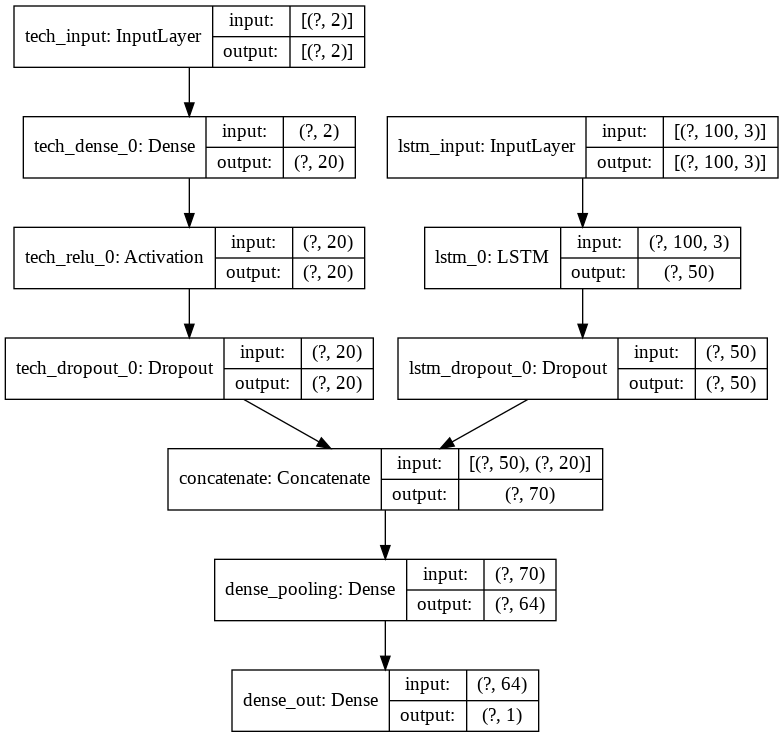

In [195]:
lstm_input = Input(shape=(puntos_pasados, 3), name='lstm_input')
dense_input = Input(shape=(indicadores_normalizados.shape[1],), name='tech_input')

x = LSTM(50, name='lstm_0')(lstm_input)
x = Dropout(0.2, name='lstm_dropout_0')(x)
lstm_branch = Model(inputs=lstm_input, outputs=x)

y = Dense(20, name='tech_dense_0')(dense_input)
y = Activation("relu", name='tech_relu_0')(y)
y = Dropout(0.2, name='tech_dropout_0')(y)
indicadores_normalizados_branch = Model(inputs=dense_input, outputs=y)

combined = concatenate([lstm_branch.output, indicadores_normalizados_branch.output], name='concatenate')
 
z = Dense(64, activation="sigmoid", name='dense_pooling')(combined)
z = Dense(1, activation="linear", name='dense_out')(z)

model = Model(inputs=[lstm_branch.input, indicadores_normalizados_branch.input], outputs=z)

adam = optimizers.Adam(lr=0.0005)

model.compile(optimizer=adam, loss='mse')

from keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True)


In [196]:
model.fit(x=[x_train, indicadores_train], y=y_train, batch_size=32, epochs=puntos_pasados, shuffle=True, validation_split=0.1)
evaluation = model.evaluate([x_test, indicadores_test], y_test)
print(evaluation)


Epoch 1/100
184/184 [==============================] - 7s 41ms/step - loss: 0.0478 - val_loss: 0.0077
Epoch 2/100
184/184 [==============================] - 7s 39ms/step - loss: 0.0017 - val_loss: 0.0028
Epoch 3/100
184/184 [==============================] - 7s 40ms/step - loss: 0.0015 - val_loss: 0.0033
Epoch 4/100
184/184 [==============================] - 7s 40ms/step - loss: 0.0012 - val_loss: 9.5291e-04
Epoch 5/100
184/184 [==============================] - 7s 40ms/step - loss: 0.0010 - val_loss: 9.6730e-04
Epoch 6/100
184/184 [==============================] - 7s 40ms/step - loss: 8.8522e-04 - val_loss: 0.0010
Epoch 7/100
184/184 [==============================] - 7s 40ms/step - loss: 7.6979e-04 - val_loss: 0.0016
Epoch 8/100
184/184 [==============================] - 7s 40ms/step - loss: 6.7830e-04 - val_loss: 5.9385e-04
Epoch 9/100
184/184 [==============================] - 7s 40ms/step - loss: 6.1721e-04 - val_loss: 4.6496e-04
Epoch 10/100
184/184 [============================

In [197]:
prediccion_y_test = model.predict([x_test, indicadores_test])
prediccion_y_test = y_scaler.inverse_transform(prediccion_y_test)
# y_predicted = model.predict([ohlcv_histories, indicadores_test])
# y_predicted = y_normaliser.inverse_transform(y_predicted)
assert y_test_sin_escalar.shape == prediccion_y_test.shape
real_mse = np.mean(np.square(y_test_sin_escalar - prediccion_y_test))
scaled_mse = real_mse / (np.max(y_test_sin_escalar) - np.min(y_test_sin_escalar)) * 100
print(scaled_mse)


0.10221398029641117


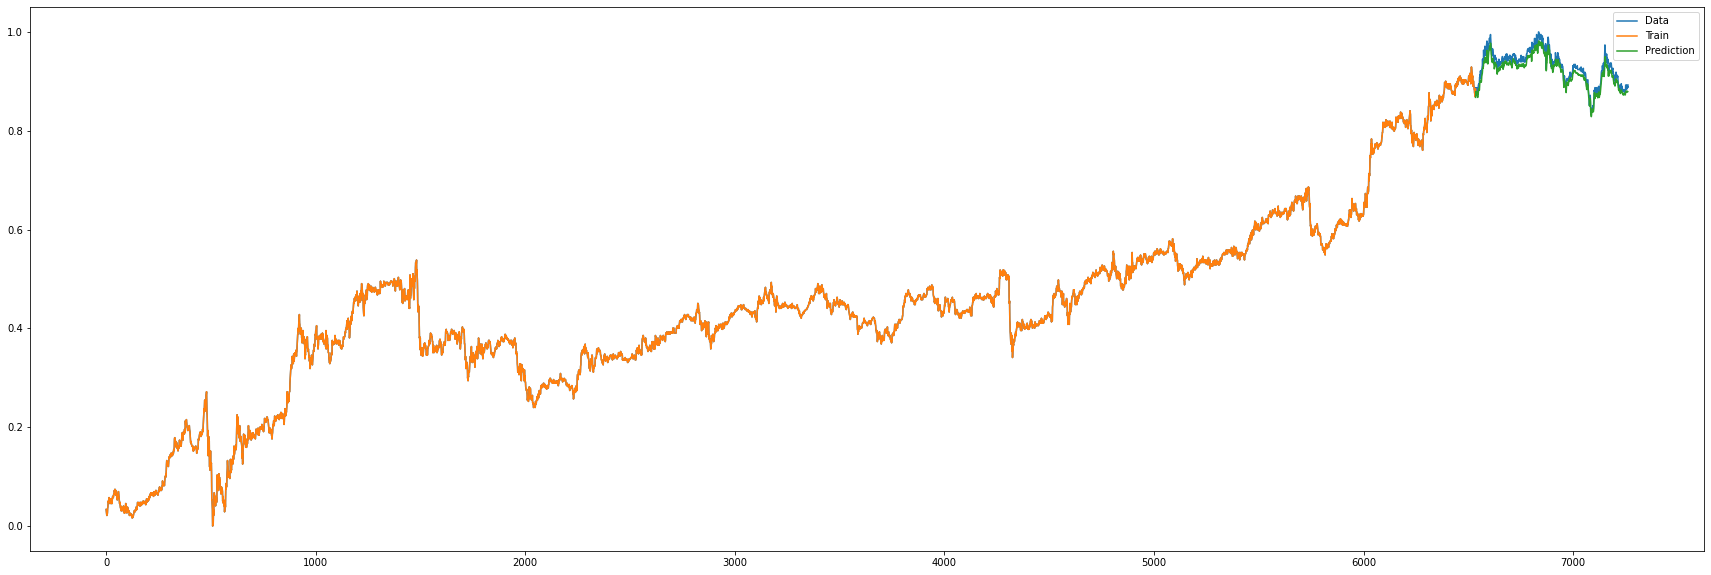

In [198]:
# plt.gcf().set_size_inches(22, 15, forward=True)

# start = 0
# end = -1

# real = plt.plot(y_test_sin_escalar[start:end], label='real')
# pred = plt.plot(prediccion_y_test[start:end], label='predicted')

# # real = plt.plot(datos_cierre[start:end], label='real')
# # pred = plt.plot(y_predicted[start:end], label='predicted')

# plt.legend(['Real', 'Predicted'])

# plt.show()
trainPredictPlot = np.empty_like(todo_entrenar_y)
trainPredictPlot[:] = np.nan
trainPredictPlot[:len(y_train)] = y_train

testPredictPlot = np.empty_like(todo_entrenar_y)
testPredictPlot[:] = np.nan
testPredictPlot[len(y_train) - 1:-1] = prediccion_y_test[:, 0]

plt.gcf().set_size_inches(30, 10)
plt.plot(todo_entrenar_y)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['Data', 'Train', 'Prediction'])
plt.show()

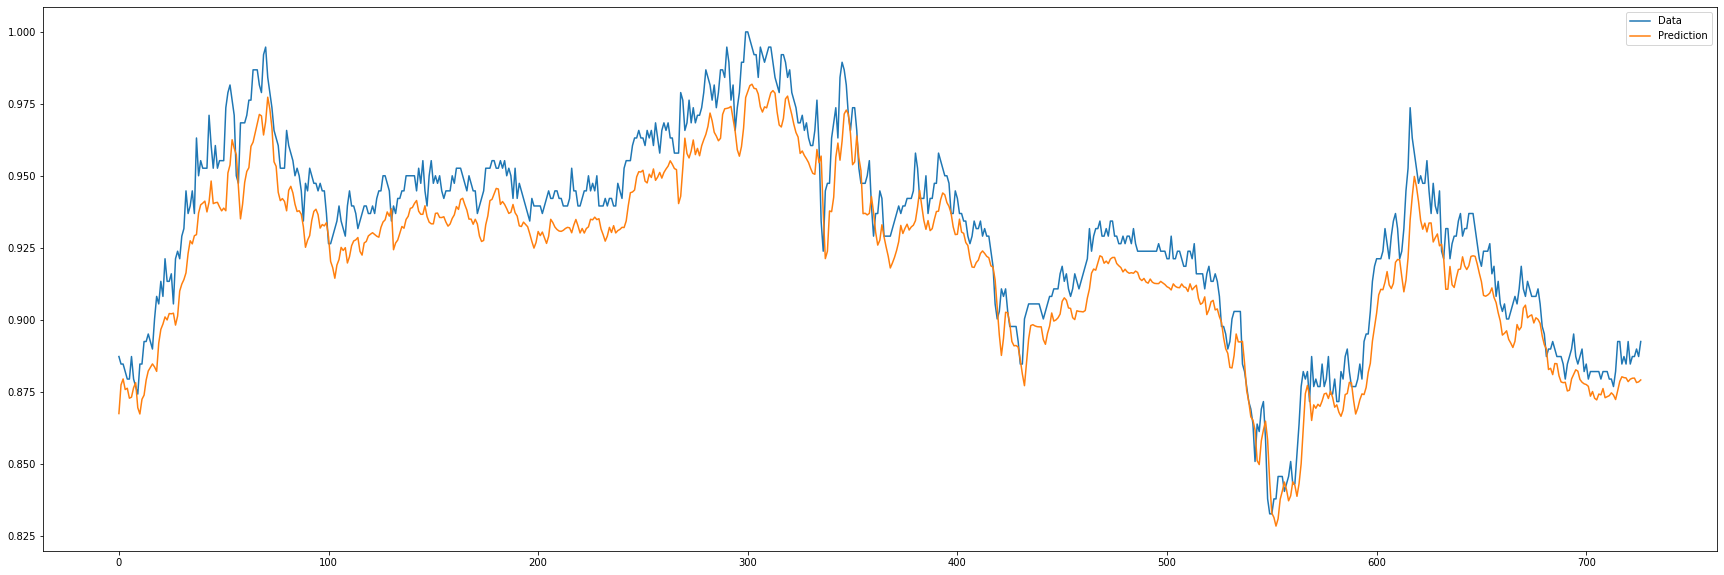

In [199]:
testPredictPlot = np.empty_like(todo_entrenar_y[6535:])
testPredictPlot[:] = np.nan
testPredictPlot[:-1] = prediccion_y_test[:, 0]

plt.gcf().set_size_inches(30, 10)
plt.gcf().set_size_inches(30, 10)

plt.plot(todo_entrenar_y[6536:])
plt.plot(testPredictPlot)
plt.legend(['Data', 'Prediction'])
plt.show()

<a id="h"></a>
### 4. Conclusiones

---
[Regresar a contenido](#general)

Nuestros resultados muestran una gran discrepancia entre el rendimiento de la pérdida de entrenamiento y el rendimiento económico de los modelos.

Con nuestros resultados no tratamos de decir que la tarea de predecir los precios de las acciones sea imposible. Definitivamente es posible, existen varios algoritmos y bots comerciales que emplean cierta cantidad de aprendizaje automático, pero no es tan sencillo, de otro modo todos lo harían.

Se requerirá un poco más de esfuerzo y de información para formular el enunciado del problema, las entradas y el modelo. Una buena dirección para avanzar sería predecir cambios en el valor (una derivada o una segunda derivada) en lugar del valor en sí. O utilizar un conjunto de modelos para lograr objetivos combinados / diferentes.

Aunque la dimensión de entrada es muy grande, el algoritmo ha demostrado una capacidad aceptable para aprender de él sin la necesidad de ninguna técnica de reducción de dimensión como la selección de características, ya que, en comparación con los otros modelos de aprendizaje automático, ha mostrado ganancias considerables en términos de precisión, pero por otro lado, creemos que la varianza podría ser menor y eso contribuiría a un modelo más confiable.